In [1]:
import pythetatools.toyxp as toyxp
from pythetatools.config import *
from pythetatools.config_visualisation import *

from pythetatools.base_visualisation import show_minor_ticks
from pythetatools.base_analysis import divide_arrays, poisson_error_bars

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot
from matplotlib import gridspec

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.28/04


In [2]:
dir_ver = 'OA2023'
base_dir = f"{inputs_dir}/{dir_ver}/ToyXP"

outdir_path = f'{outputs_dir}/plots/{dir_ver}/ToyXp/'
os.makedirs(outdir_path, exist_ok=True)

In [3]:
sample_titles = ['numu1R', 'nue1R', 'numubar1R', 'nuebar1R', 'nue1RD', 'numucc1pi']


local_path_to_asimovnoosc = f"{base_dir}/ToyXP_NoOsc_OA2023_hist_by_interaction.root"
local_path_to_asimovbf = f"{base_dir}/ToyXP_AsimovBestFit_OA2023_postBanff_systpostSK.root"
local_path_to_data = f"{base_dir}/Datafile_run11.root"


samples_dict = toyxp.get_samples_info(local_path_to_asimovbf, sample_titles=sample_titles)


In [4]:
axis = 'energy'

asimov_dataset_noosc = toyxp.load(local_path_to_asimovnoosc, kind="asimov", samples_dict=samples_dict)
asimov_dataset_bf = toyxp.load(local_path_to_asimovbf, kind="asimov", samples_dict=samples_dict)
data = toyxp.load(local_path_to_data, kind="data",  samples_dict=samples_dict)

asimov_noosc_1D = toyxp.project_all_samples(asimov_dataset_noosc, axis)
asimov_bf_1D = toyxp.project_all_samples(asimov_dataset_bf, axis)
data_1D = toyxp.project_all_samples(data, axis)



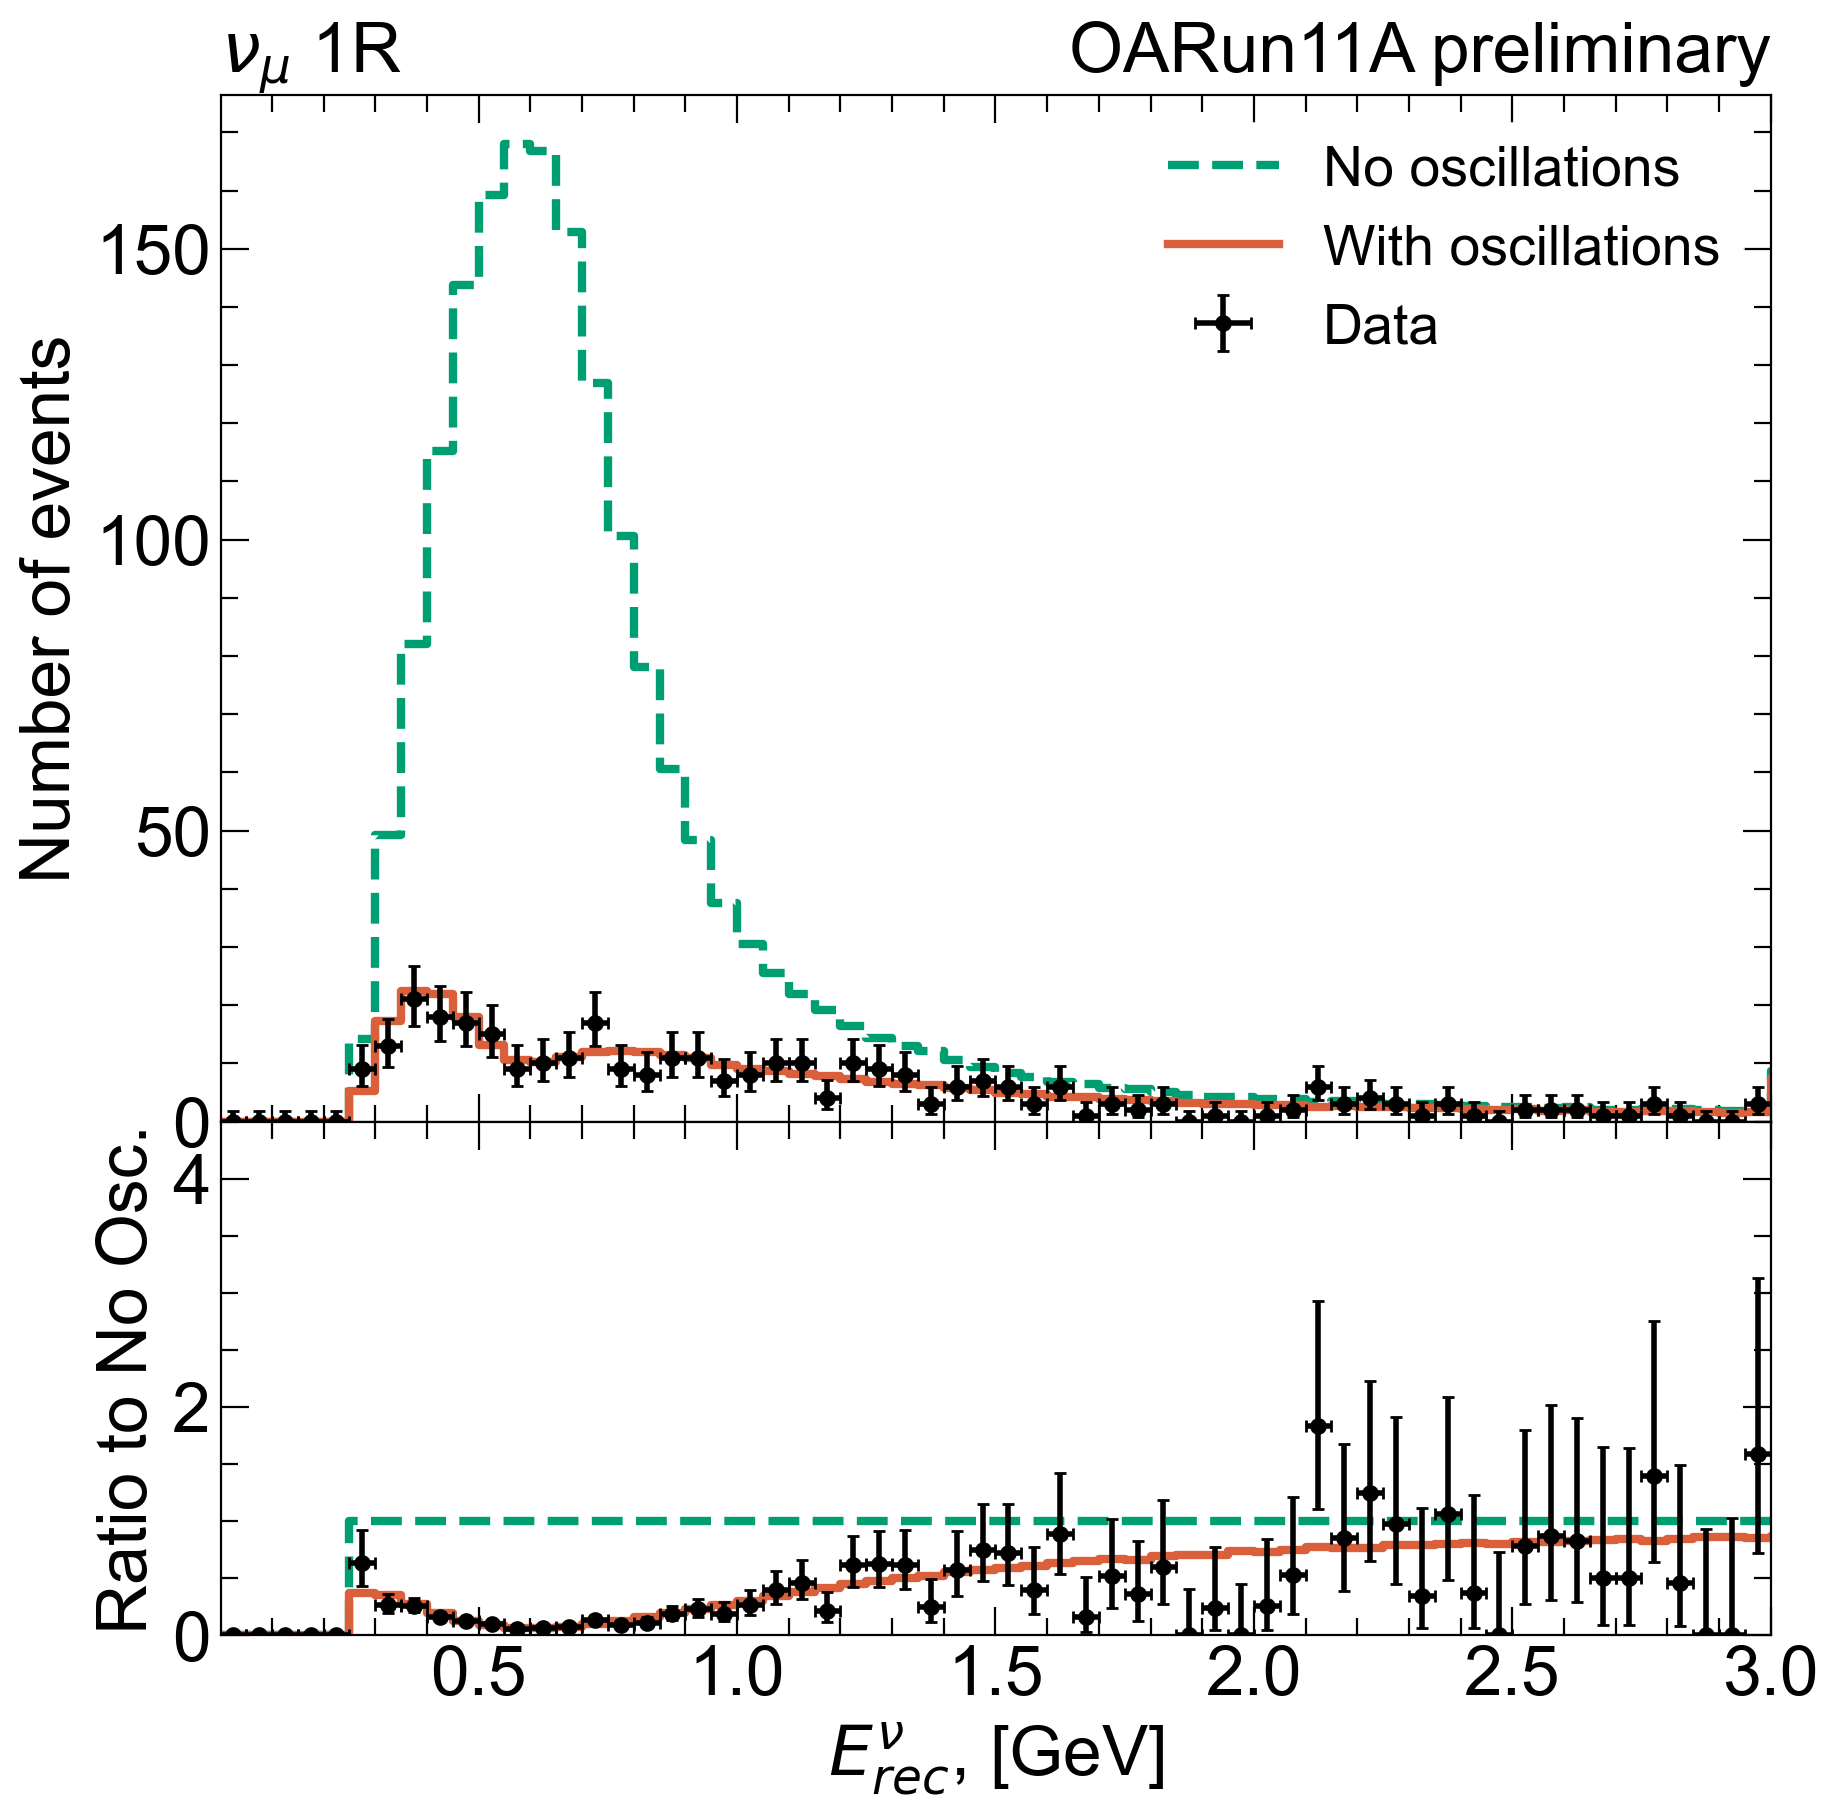

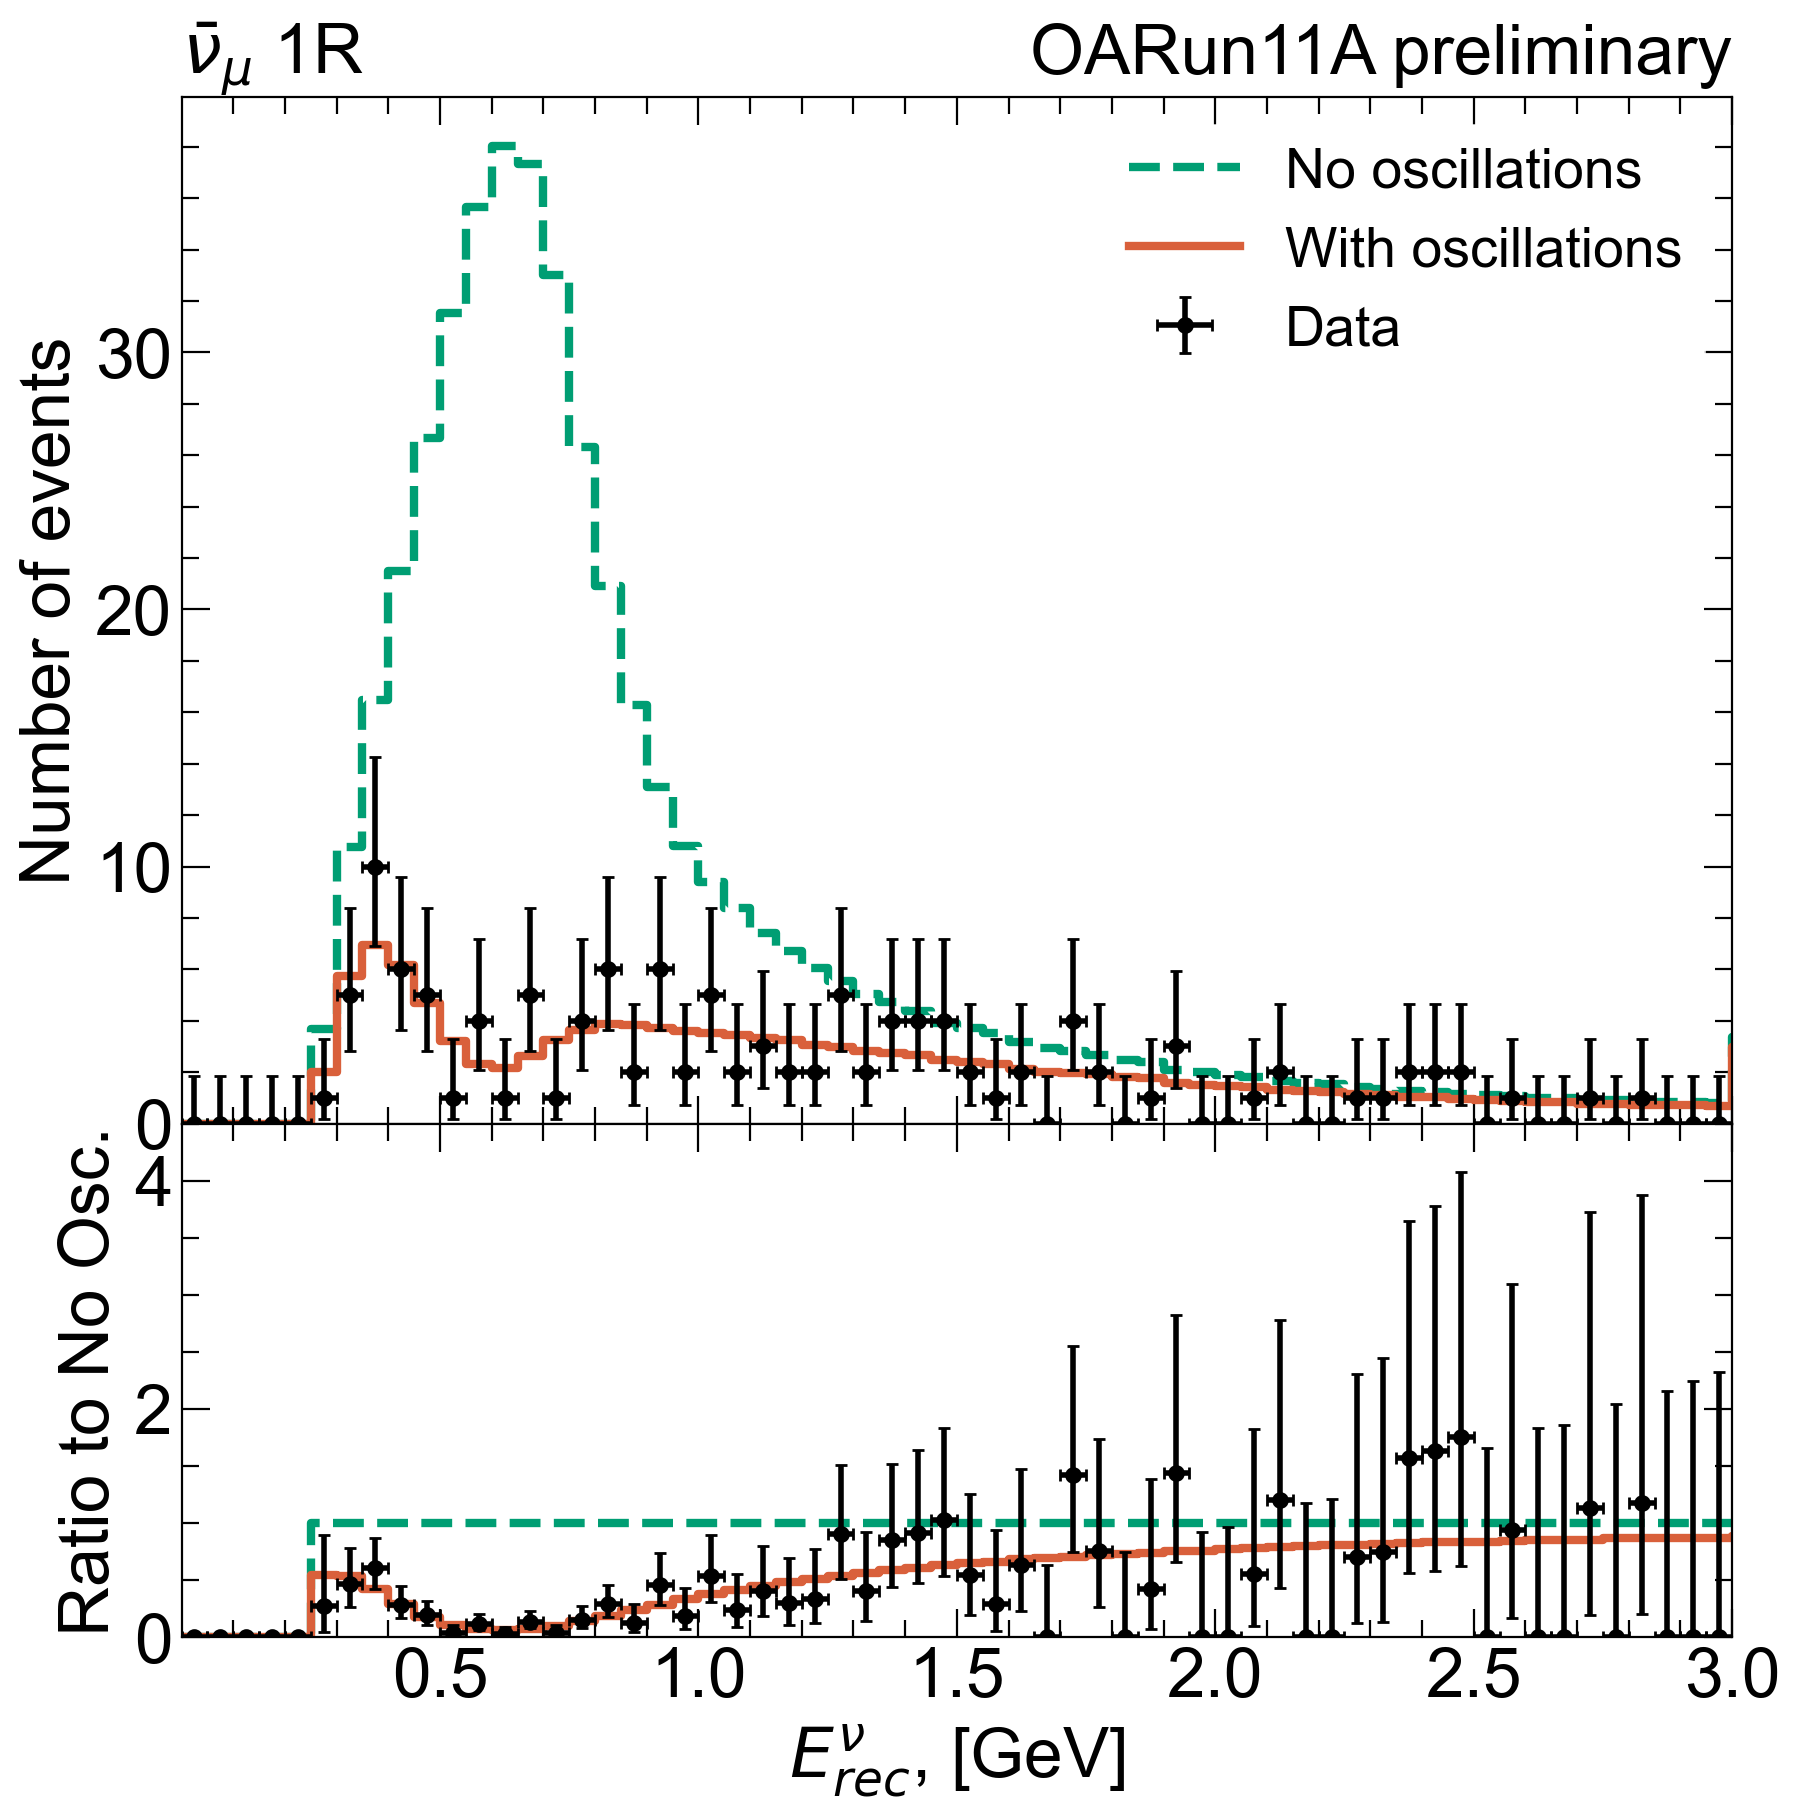

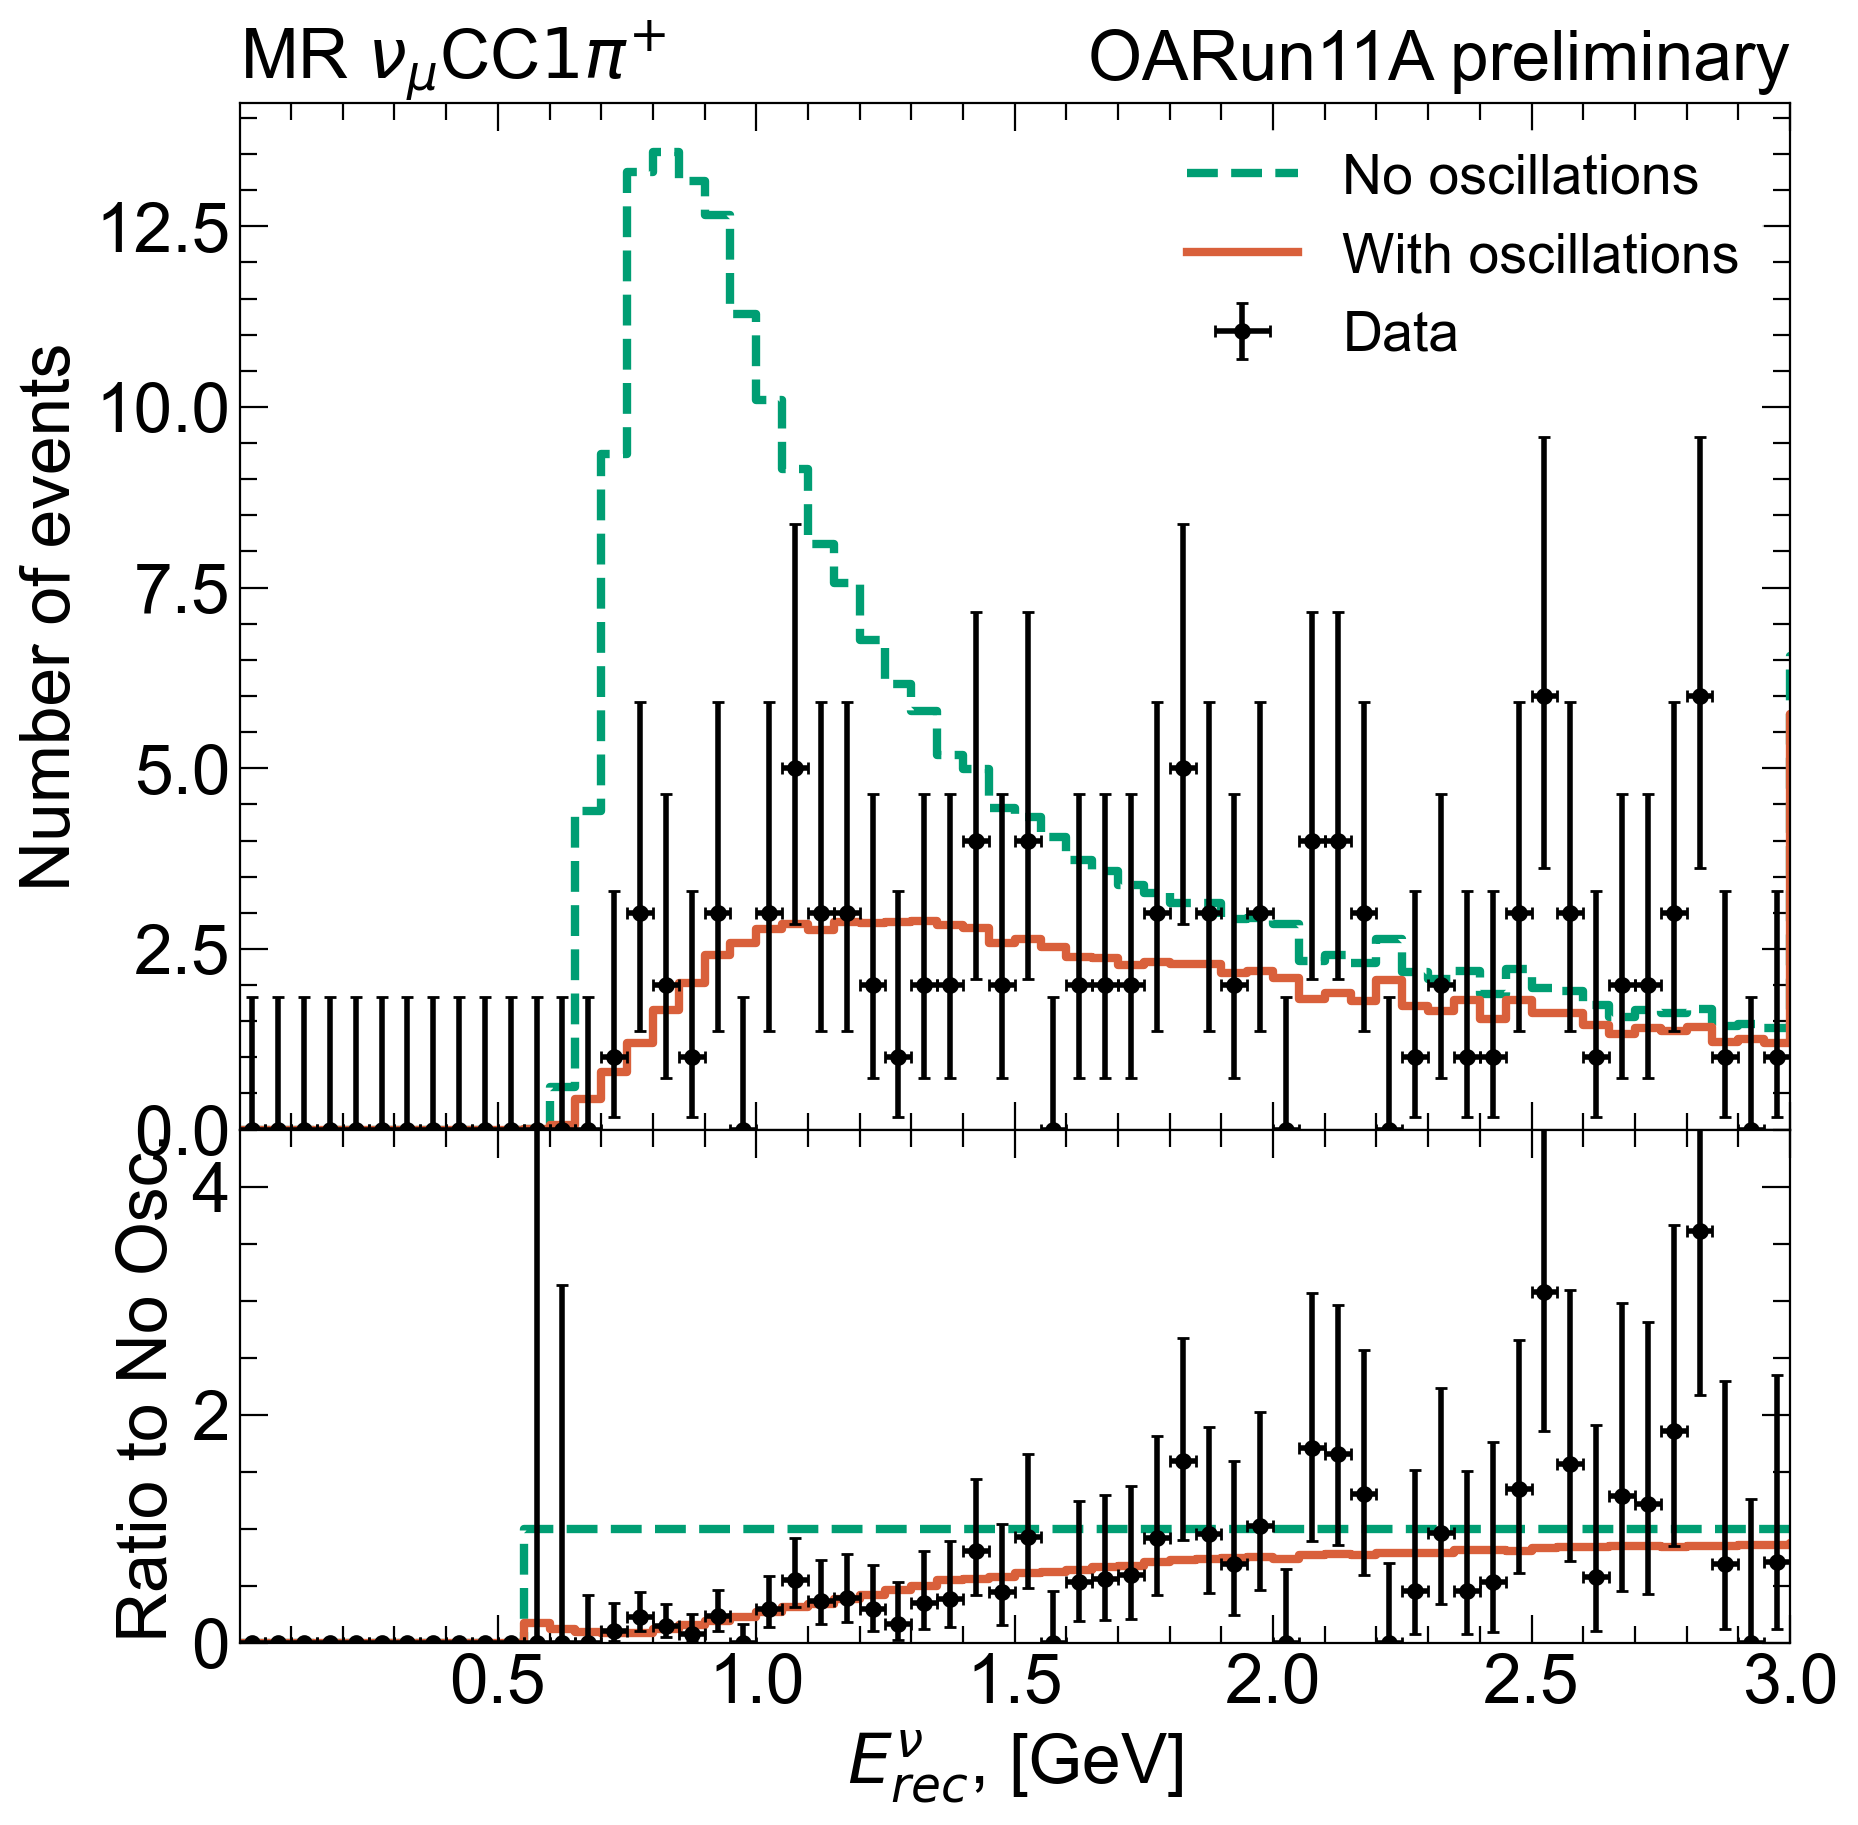

In [5]:
for sample_title in ['numu1R', 'numubar1R', 'numucc1pi']:
    fig = plt.figure(figsize=(10, 10))

    gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])  # The first subplot will be twice as large as the second
    ax1 = fig.add_subplot(gs[0])  
    ax2 = fig.add_subplot(gs[1])  
    
    asimov_noosc_1D[sample_title].plot(ax1, label='No oscillations', ls='--', color=bluish_green)
    asimov_bf_1D[sample_title].plot(ax1, label='With oscillations', color=vermilion)
    data_1D[sample_title].plot(ax1, wtag=True, kind='data', label='Data')
    
    (asimov_noosc_1D[sample_title]/asimov_noosc_1D[sample_title]).plot(ax2, wtitle=False, wtag=False,
                                            label='No oscillations', ls='--', color=bluish_green)
    (asimov_bf_1D[sample_title]/asimov_noosc_1D[sample_title]).plot(ax2, wtitle=False, wtag=False,
                                            label='With oscillations', color=vermilion)
    
    yerr = [divide_arrays(poisson_error_bars(data_1D[sample_title].z, 1-0.6827)[i],
                          asimov_noosc_1D[sample_title].z) for i in range(2)]
    (data_1D[sample_title]/asimov_noosc_1D[sample_title]).plot(ax2, kind='data', wtitle=False, wtag=False,
                                                               yerr=yerr, label='Data')
    
    
    show_minor_ticks(ax1)
    show_minor_ticks(ax2)
    ax1.legend()
    ax1.set_xticklabels([])  
    ax1.set_xlabel('')  
    ax2.set_ylim(0, 4.5)
    ax2.set_ylabel('Ratio to No Osc.')
    plt.subplots_adjust(hspace=0)
    fig.savefig(f'{outdir_path}/{sample_title}_BF_vs_Data_vs_Nosoc_axis{axis}.pdf', bbox_inches='tight')
